In [1]:
import torch
import diffusers
from diffusers import StableDiffusionPipeline

/home/chris/.conda/envs/ai/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ckpt = 'stabilityai/stable-diffusion-2'
pipe = StableDiffusionPipeline.from_pretrained(ckpt)

Fetching 16 files: 100%|██████████| 16/16 [00:00<00:00, 27616.82it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [3]:
prompt = 'portrait photo of a old warrior chief'

In [4]:
pipe = pipe.to('cuda')
pipe.enable_attention_slicing()

In [5]:
generator = torch.Generator('cuda').manual_seed(0)
image = pipe(prompt, generator=generator, ).images[0]

100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


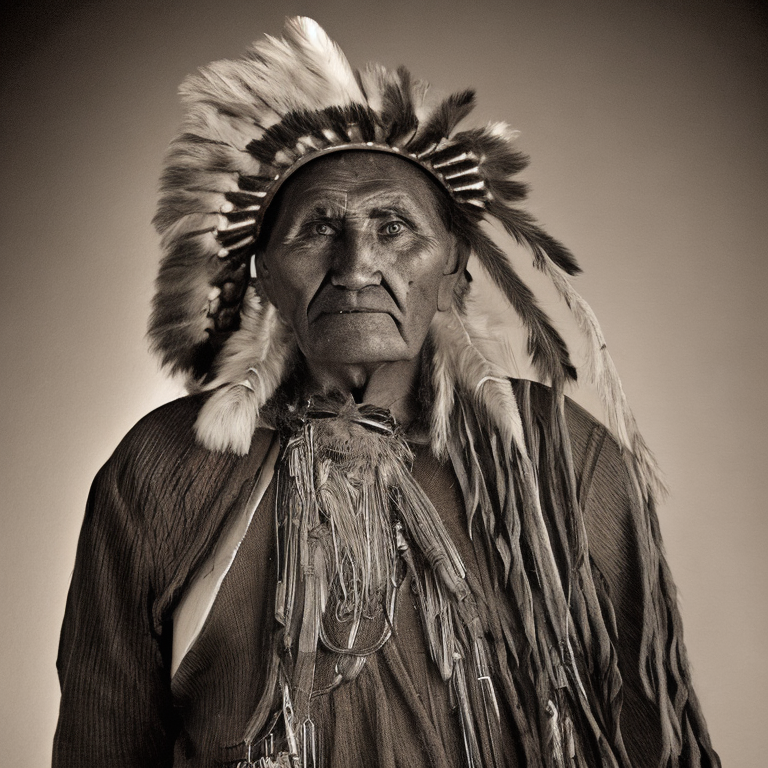

In [6]:
image

In [7]:
del pipe
del generator

In [8]:
pipe = StableDiffusionPipeline.from_pretrained(ckpt, torch_dtype=torch.float16)
pipe = pipe.to('cuda')

Fetching 16 files: 100%|██████████| 16/16 [00:00<00:00, 40451.39it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [9]:
generator = torch.Generator('cuda').manual_seed(0)
image = pipe(prompt, generator=generator).images[0]

100%|██████████| 50/50 [00:15<00:00,  3.19it/s]


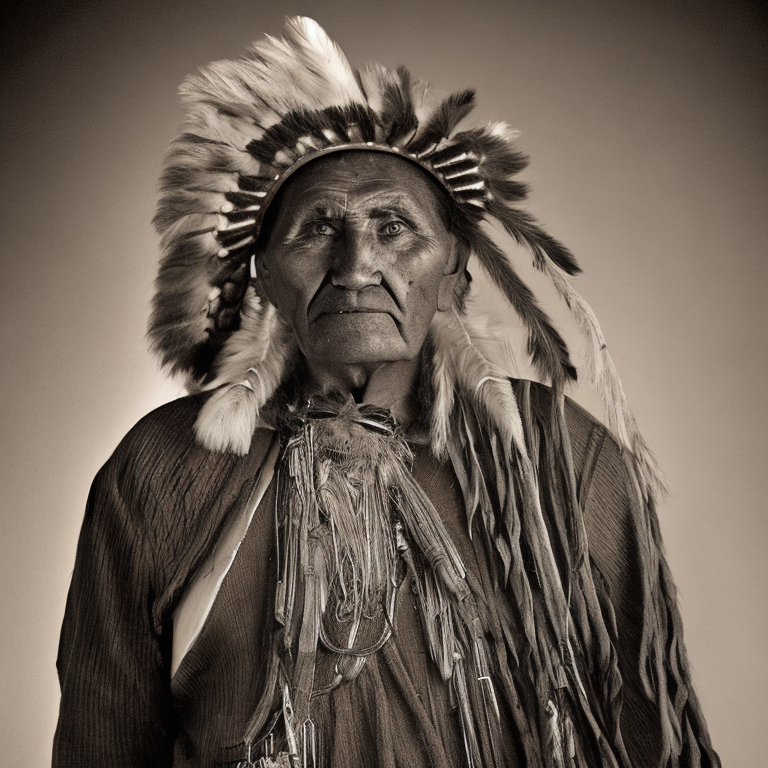

In [10]:
image

In [11]:
pipe.enable_attention_slicing()

In [13]:
generator = torch.Generator('cuda').manual_seed(0)
image = pipe(prompt, generator=generator).images[0]

100%|██████████| 50/50 [00:14<00:00,  3.38it/s]


In [14]:
pipe.scheduler.compatibles

[diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.utils.dummy_torch_and_scipy_objects.LMSDiscreteScheduler]

In [15]:
from diffusers import DDIMScheduler
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

In [20]:
generator = torch.Generator('cuda').manual_seed(0)
image = pipe(prompt, generator=generator, num_inference_steps=10).images[0]

100%|██████████| 10/10 [00:03<00:00,  3.27it/s]


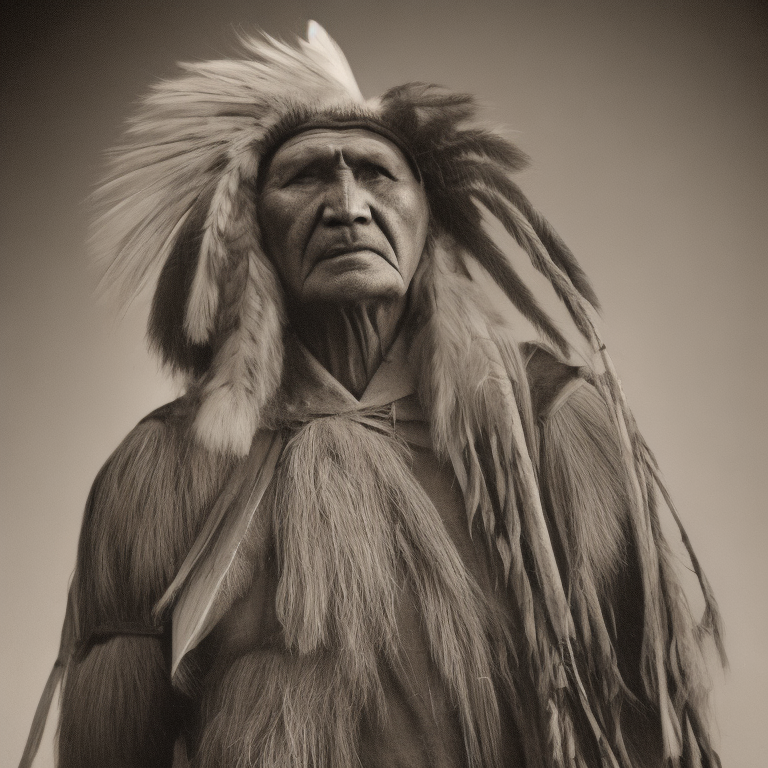

In [21]:
image

In [23]:
from diffusers import HeunDiscreteScheduler
pipe.scheduler = HeunDiscreteScheduler.from_config(pipe.scheduler.config)

In [26]:
generator = torch.Generator('cuda').manual_seed(0)
image = pipe(prompt, generator=generator, num_inference_steps=20).images[0]

100%|██████████| 20/20 [00:12<00:00,  1.66it/s]


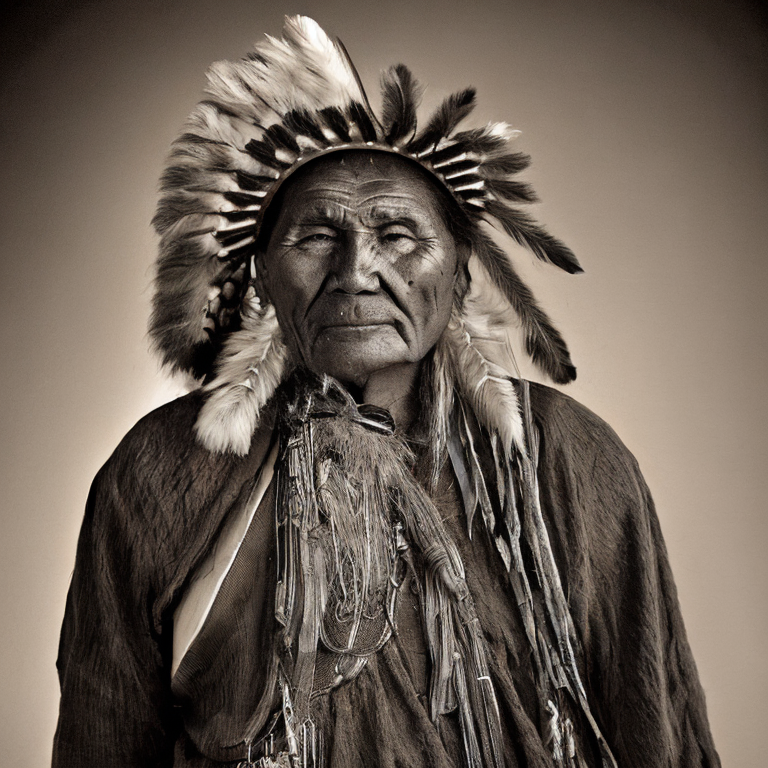

In [27]:
image